In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#DATA SET
df = pd.read_csv(r'C:\Users\hmcldryl\Desktop\cupsnheight.csv')

a = df['Person'].to_numpy()
b = df['Cups of Rice Consumed'].to_numpy()
c = df['Hours Spent on Homework'].to_numpy()
d = df['Height'].to_numpy()


#INITIALS
col_title = df.columns.tolist()

#OUTPUTS
print("Synthetic Dataset of Dietary, Academic, and Physical Attributes\n")

print("Data set columns:")
for i in range(len(col_cat)):
    print(i + 1, col_title[i])
    
#proof of clean data set
print("\nOriginal Data Shape:", df.shape)
print("Missing Values:") 
print(df.isnull().sum())
print("\nFirst 5 Person:\n", df.head())

Synthetic Dataset of Dietary, Academic, and Physical Attributes

Data set columns:
1 Person
2 Cups of Rice Consumed
3 Hours Spent on Homework
4 Height

Original Data Shape: (100, 4)
Missing Values:
Person                     0
Cups of Rice Consumed      0
Hours Spent on Homework    0
Height                     0
dtype: int64

First 5 Person:
    Person  Cups of Rice Consumed  Hours Spent on Homework  Height
0       1                   2.45                     3.12   170.3
1       2                   1.87                     1.58   160.1
2       3                   3.22                     2.04   175.7
3       4                   2.01                     4.47   168.9
4       5                   1.05                     2.53   162.4


In [13]:
#numpy operations

sumcrc = np.sum(b)
maxcrc = np.max(b)
mincrc = np.min(b)
meanhsh = np.mean(c)
medianhsh = np.median(c)
perhsh = np.percentile(c, [45, 50, 55])
stdh = np.std(d)
varh = np.var(d)
rangeh = np.ptp(d)

print("\nCup of Rice Consumed Statistics:")
print(f"Sum of Cup of Rice Consumed: {sumcrc:.1f}")
print(f"Maximum of Cup of Rice Consumed: {maxcrc:.1f}")
print(f"Minimum of Cup of Rice Consumed: {mincrc:.1f}")

print("\nHours Spent on Homework Statistics:")
print(f"Mean of Hours Spent on Homework: {meanhsh:.1f}")
print(f"Median of Hours Spent on Homework: {medianhsh:.1f}")
print(f"45th, 50th, and 55th Percentile of Hours Spent on Homework: {perhsh}")

print("\nHeight Statistics:")
print(f"Standard Deviation of Height: {stdh:.1f}")
print(f"Variance of Height: {varh:.1f}")
print(f"Range of Height: {rangeh:.1f}")


Cup of Rice Consumed Statistics:
Sum of Cup of Rice Consumed: 239.8
Maximum of Cup of Rice Consumed: 3.8
Minimum of Cup of Rice Consumed: 1.1

Hours Spent on Homework Statistics:
Mean of Hours Spent on Homework: 3.0
Median of Hours Spent on Homework: 3.2
45th, 50th, and 55th Percentile of Hours Spent on Homework: [2.8975 3.165  3.2935]

Height Statistics:
Standard Deviation of Height: 6.8
Variance of Height: 45.8
Range of Height: 22.9


Samples from Cups of Rice Consumed
Array 1 [2.45 1.87 3.22 2.01 1.05] 
Array 2 [3.56 2.21 1.75 2.98 2.79] 
Array 3 [3.03 1.43 2.67 3.78 1.92] 
Array 4 [2.55 1.34 3.49 2.12 1.99]

One-Way Anova 

F-statistic: 0.4664, P-value: 0.70980794


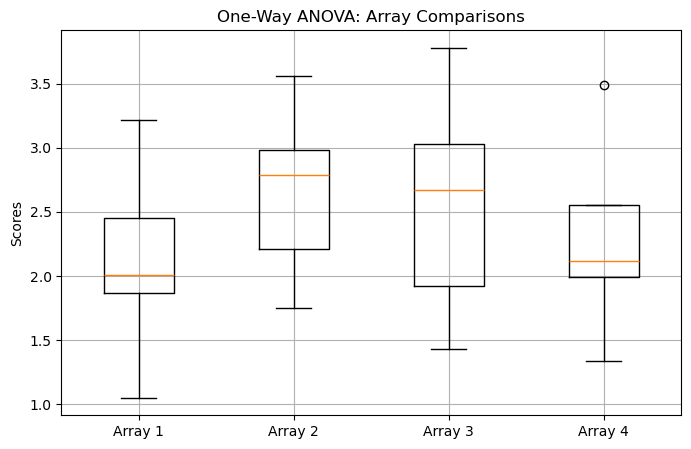


Z-Distribution

Z-score for first 5 values:
0.46314706101417047 -0.3508689856167957 1.5438235367139013 -0.15438235367139055 -1.5017192584398857 

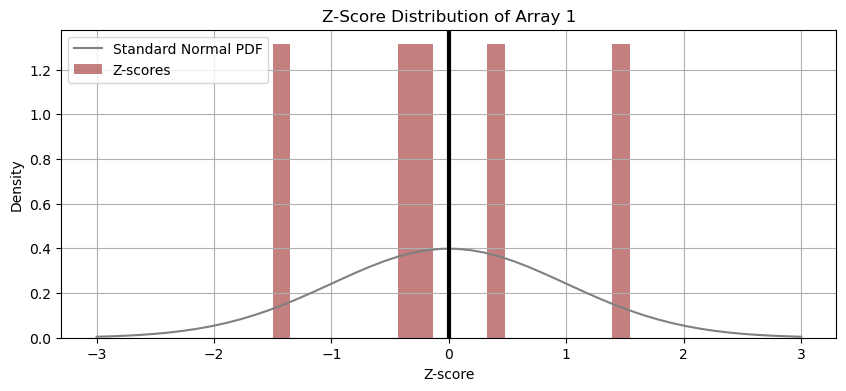

T - Test

T-test between Array 3 and Array 4: 
t = 0.49 
p = 0.636


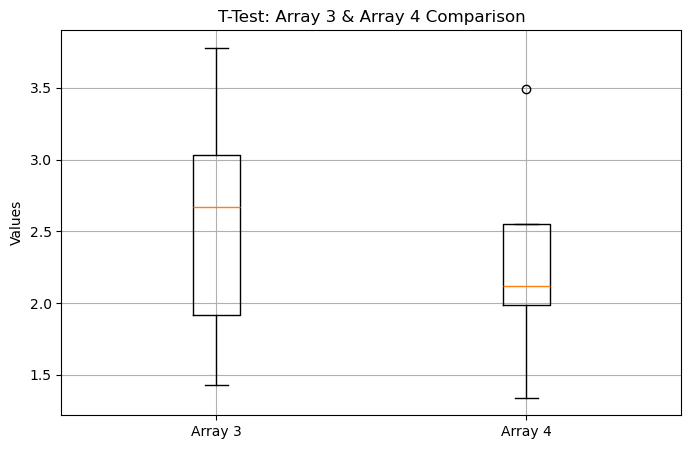

In [26]:
#scipy operations

#sampling the data set into 4 arrays (samples) with 5 values each
arr1 = np.array([])
arr2 = np.array([])
arr3 = np.array([])
arr4 = np.array([])
for i in range(20):
    if i < 5:
        arr1 = np.append(arr1, b[i])

    if i < 10 and i > 4:
        arr2 = np.append(arr2, b[i])

    if i < 15 and i > 9:
        arr3 = np.append(arr3, b[i])

    if i < 20 and i > 14:
        arr4 = np.append(arr4, b[i])

print("Samples from Cups of Rice Consumed\nArray 1", arr1,"\nArray 2", arr2, "\nArray 3",arr3, "\nArray 4",arr4)

#one-way anova
f_statistic, p_value = stats.f_oneway(arr1, arr2, arr3, arr4)
print(f"\nOne-Way Anova \n\nF-statistic: {f_statistic:.4f}, P-value: {p_value:.8f}")

#plot
data = [arr1, arr2, arr3, arr4]
labels = ['Array 1', 'Array 2', 'Array 3', 'Array 4']

plt.figure(figsize=(8, 5))
plt.boxplot(data, tick_labels=labels)
plt.title('One-Way ANOVA: Array Comparisons')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

#standard normal
zval = stats.zscore(arr1)
print(f"\nZ-Distribution\n\nZ-score for first 5 values:")
for i in range(5):
    print(zval[i], end=' ')

#plot
z_range = np.linspace(-3, 3, 50)
pdf = stats.norm.pdf(z_range)

plt.figure(figsize=(10, 4))
plt.plot(z_range, pdf, color='gray', linestyle='-', label='Standard Normal PDF')

plt.hist(zval, bins=20, density=True, alpha=0.5, label='Z-scores', color='darkred')

plt.axvline(0, color='black', linestyle='-', linewidth=3)
plt.title('Z-Score Distribution of Array 1')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

#t-test
t_stat, p_value = stats.ttest_ind(arr3, arr4)
print(f"T - Test\n\nT-test between Array 3 and Array 4: \nt = {t_stat:.2f} \np = {p_value:.3f}")

#plot
plt.figure(figsize=(8, 5))
plt.boxplot([arr3, arr4], tick_labels=['Array 3', 'Array 4'])
plt.title('T-Test: Array 3 & Array 4 Comparison')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [15]:
#Statsmodels

x = sm.add_constant(df['Hours Spent on Homework'])
model = sm.OLS(df['Cups of Rice Consumed'], x).fit()
print("\nLinear Regression Summary:")
print(model.summary())


Linear Regression Summary:
                              OLS Regression Results                             
Dep. Variable:     Cups of Rice Consumed   R-squared:                       0.122
Model:                               OLS   Adj. R-squared:                  0.113
Method:                    Least Squares   F-statistic:                     13.60
Date:                   Fri, 23 May 2025   Prob (F-statistic):           0.000372
Time:                           21:00:19   Log-Likelihood:                -105.94
No. Observations:                    100   AIC:                             215.9
Df Residuals:                         98   BIC:                             221.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Cups of Rice Consumed vs Hours Spent on Homework
Correlation coefficient (Pearson r): 0.3490595903188209


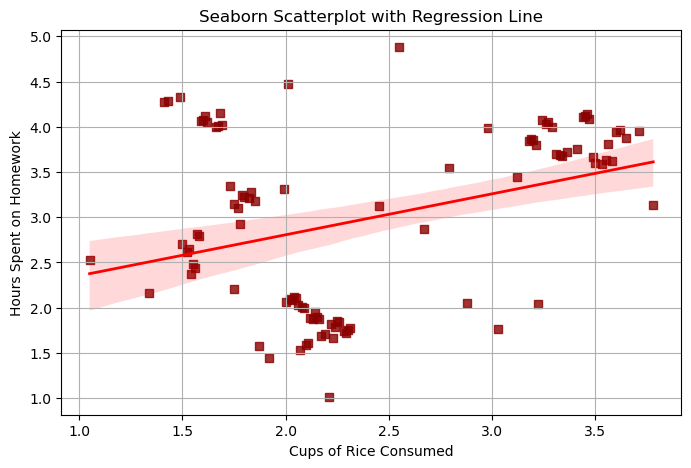


Cups of Rice Consumed vs Height
Correlation coefficient (Pearson r): 0.96732567328799


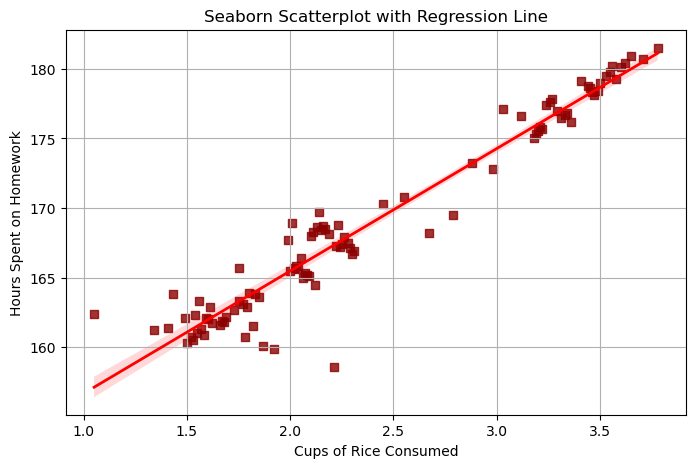


Hours Spent on Homework vs Height
Correlation coefficient (Pearson r): 0.3828282787325287


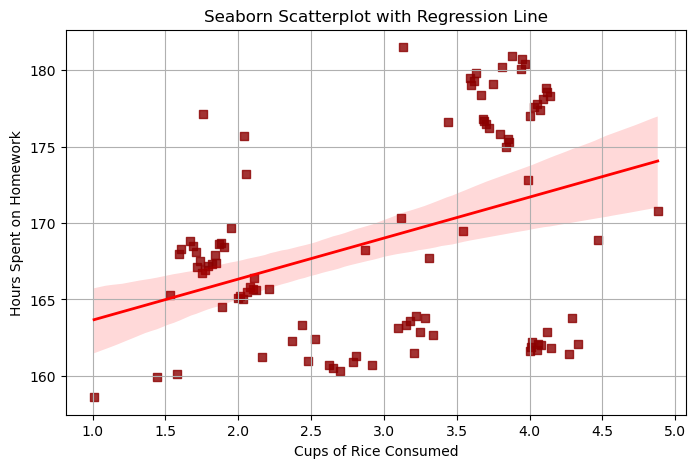

In [27]:
#correlation with visualizations
x = 1
y = 2

#corr1
corr_matrix = np.corrcoef(b, c)
correlation = corr_matrix[0, 1]
print(col_cat[x], "vs", col_cat[y])
print("Correlation coefficient (Pearson r):", correlation)
y += 1

#plot for corr1
ds = pd.DataFrame({'X': b, 'Y': c})

plt.figure(figsize=(8, 5))
sns.regplot(x='X', y='Y', data=ds, color='darkred', marker=',', ci = 95, line_kws={'color': 'red', 'linewidth': 2})

plt.title('Seaborn Scatterplot with Regression Line')
plt.xlabel('Cups of Rice Consumed')
plt.ylabel('Hours Spent on Homework')
plt.grid(True)
plt.show()

#corr2
corr_matrix = np.corrcoef(b, d)
correlation = corr_matrix[0, 1]
print()
print(col_title[x], "vs", col_title[y])
print("Correlation coefficient (Pearson r):", correlation)
x += 1

#plot for corr2
ds = pd.DataFrame({'X': b, 'Y': d})

plt.figure(figsize=(8, 5))
sns.regplot(x='X', y='Y', data=ds, color='darkred', marker=',', ci = 95, line_kws={'color': 'red', 'linewidth': 2})

plt.title('Seaborn Scatterplot with Regression Line')
plt.xlabel('Cups of Rice Consumed')
plt.ylabel('Hours Spent on Homework')
plt.grid(True)
plt.show()

#corr3
corr_matrix = np.corrcoef(c, d)
correlation = corr_matrix[0, 1]
print()
print(col_title[x], "vs", col_title[y])
print("Correlation coefficient (Pearson r):", correlation)

#plot for corr3
ds = pd.DataFrame({'X': c, 'Y': d})

plt.figure(figsize=(8, 5))
sns.regplot(x='X', y='Y', data=ds, color='darkred', marker=',', ci = 95, line_kws={'color': 'red', 'linewidth': 2})

plt.title('Seaborn Scatterplot with Regression Line')
plt.xlabel('Cups of Rice Consumed')
plt.ylabel('Hours Spent on Homework')
plt.grid(True)
plt.show()

Legend:
CRC = Cups of Rice Consumed
HSH = Hours Spent on Homework


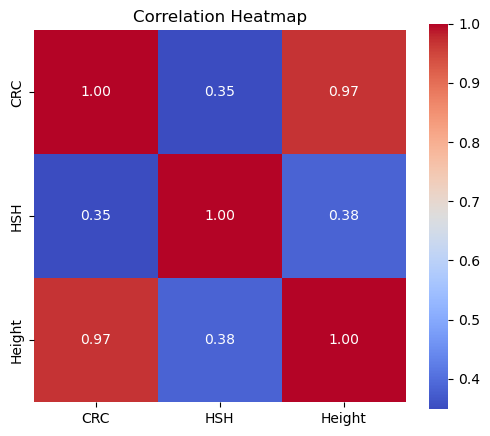

In [33]:
#seaborn

legend = ["CRC","HSH"]
print("Legend:")
for i in range(2):
    print(legend[i], "=", col_title[i+1])

dx = pd.DataFrame({'CRC': b, 'HSH': c, 'Height': d})
corr = dx.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()